# Titanic: Machine Learning from Disaster from Kaggle Competition

My name is André Fernandes and in this notebook is presented my solution proposal for the competition.
Feel free to connect with me on LinkedIn and check out my other projects on GitHub:
- [LinkedIn](https://www.linkedin.com/in/andré-fernandes-868006207/)
- [GitHub](https://github.com/vBarFace)

Bellow, is the description of the competition and the link to main page if you want to check it for your self.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Modeling](#Modeling)
6. [Model Evaluation](#Model-Evaluation)
7. [Conclusion](#Conclusion)
8. [References](#References)

## Introduction
The Titanic dataset is a classic machine learning dataset from the Titanic disaster in 1912. This notebook will guide you through the process of building a predictive model that answers the question: "What sorts of people were more likely to survive?" using passenger data (such as age, gender, class, etc.).

This competition is hosted on [Kaggle](https://www.kaggle.com/competitions/titanic/overview).
Also, there is a tutorial link that might be useful. Click [here!](https://www.kaggle.com/code/alexisbcook/titanic-tutorial)

## Data Description
The dataset consists of two files:
- `train.csv`: The training dataset
- `test.csv`: The test dataset

### Data Dictionary
- **PassengerId**: Unique ID for each passenger
- **Survived**: Survival (0 = No, 1 = Yes)
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Name of the passenger
- **Sex**: Gender
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard the Titanic
- **Parch**: Number of parents/children aboard the Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Exploratory Data Analysis (EDA)
In this section, we will perform exploratory data analysis to uncover patterns and insights in the dataset. We will visualize the distribution of various features and their relationships with the target variable (Survived).

## Data Preprocessing
Data preprocessing steps include:
- Handling missing values
- Encoding categorical variables
- Feature engineering
- Scaling numerical features

## Modeling
We will build several machine learning models to predict the survival of passengers. The models we will consider include:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K-Nearest Neighbors

## Model Evaluation
We will evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, and F1-score. We will also use cross-validation to ensure the robustness of our models.

## Conclusion
Summarize the findings from the EDA, preprocessing, and modeling sections. Discuss the performance of the different models and suggest potential improvements.

## References
- Kaggle Titanic Competition: [Kaggle Titanic Competition](https://www.kaggle.com/competitions/titanic/overview)
- ChatGPT

# ----- Beginning of my Solution Proposal -----
###### Usage:
Create a folder named "Titanic_Machine_Learning_from_Disaster" and get the "titanic" folder (given by kaggle that is the dataset) inside of "Titanic_Machine_Learning_from_Disaster". If you need to do some installs, create a cell bellow this one and install whats needed :)

### Imports

In [4]:
# Manipulate data
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For data processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# For Modeling and Trainning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Get the data

In [6]:
# Lets get the training data
train_data = pd.read_csv("../Titanic_Machine_Learning_from_Disaster/titanic/train.csv")
test_data = pd.read_csv("../Titanic_Machine_Learning_from_Disaster/titanic/test.csv")

### Lets visualize the data - Exploratory Data Analysis (EDA)

In [8]:
# First lets see the train data
print("First 5 examples of train_data:")
train_data.head()

First 5 examples of train_data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Lets see the shape of the data
print("Training set shape: ", train_data.shape)

# Lets extract some information of the shape
n_passagers = train_data.shape[0]
n_features =  train_data.shape[1]
print(f"In the traing data we have {n_passagers} passangers(samples) and {n_features} features.")

Training set shape:  (891, 12)
In the traing data we have 891 passangers(samples) and 12 features.


Text(0, 0.5, 'Number of Passengers')

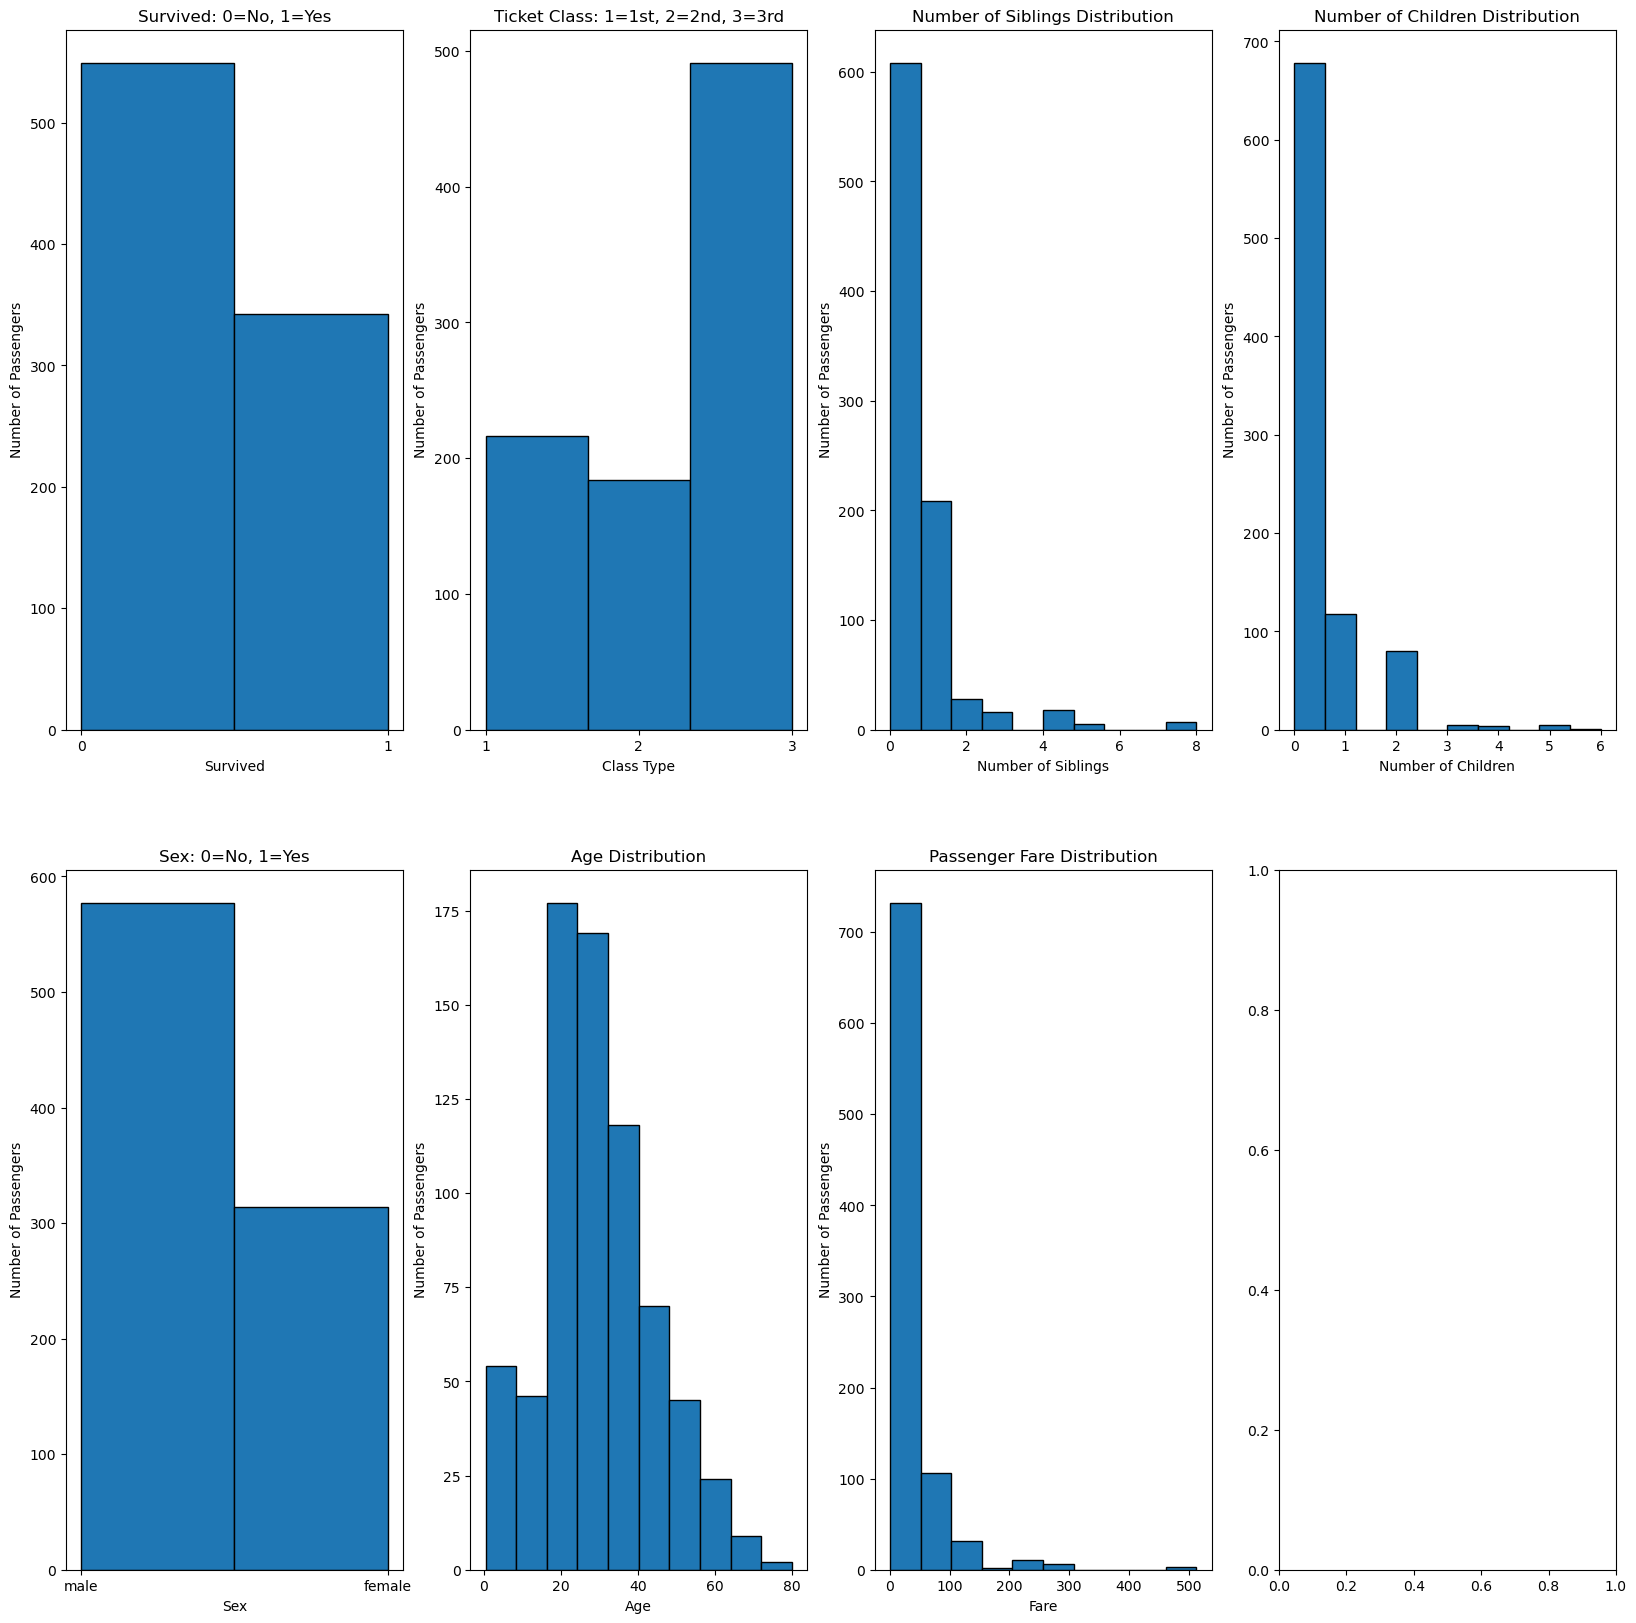

In [10]:
# Lets visualize the features distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 20))

# Histogram for the 'Survived' feature
axes[0, 0].hist(train_data['Survived'], bins=2, edgecolor='black')
axes[0, 0].set_title("Survived: 0=No, 1=Yes")
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Number of Passengers')
axes[0, 0].set_xticks([0, 1])

# Histogram for the 'Pclass' feature
axes[0, 1].hist(train_data['Pclass'], bins=3, edgecolor='black')
axes[0, 1].set_title("Ticket Class: 1=1st, 2=2nd, 3=3rd")
axes[0, 1].set_xlabel('Class Type')
axes[0, 1].set_ylabel('Number of Passengers')
axes[0, 1].set_xticks([1, 2, 3])

# Histogram for the 'Sex' feature
axes[1, 0].hist(train_data['Sex'], bins=2, edgecolor='black')
axes[1, 0].set_title("Sex: 0=No, 1=Yes")
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Number of Passengers')
axes[1, 0].set_xticks([0, 1])

# Histogram for the 'Age' feature
axes[1, 1].hist(train_data['Age'], edgecolor='black')
axes[1, 1].set_title("Age Distribution")
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Number of Passengers')

# Histogram for the 'SibSp' feature
axes[0, 2].hist(train_data['SibSp'], edgecolor='black')
axes[0, 2].set_title("Number of Siblings Distribution")
axes[0, 2].set_xlabel('Number of Siblings')
axes[0, 2].set_ylabel('Number of Passengers')

# Histogram for the 'SibSp' feature
axes[0, 3].hist(train_data['Parch'], edgecolor='black')
axes[0, 3].set_title("Number of Children Distribution")
axes[0, 3].set_xlabel('Number of Children')
axes[0, 3].set_ylabel('Number of Passengers')

# Histogram for the 'SibSp' feature
axes[1, 2].hist(train_data['Fare'], edgecolor='black')
axes[1, 2].set_title("Passenger Fare Distribution")
axes[1, 2].set_xlabel('Fare')
axes[1, 2].set_ylabel('Number of Passengers')

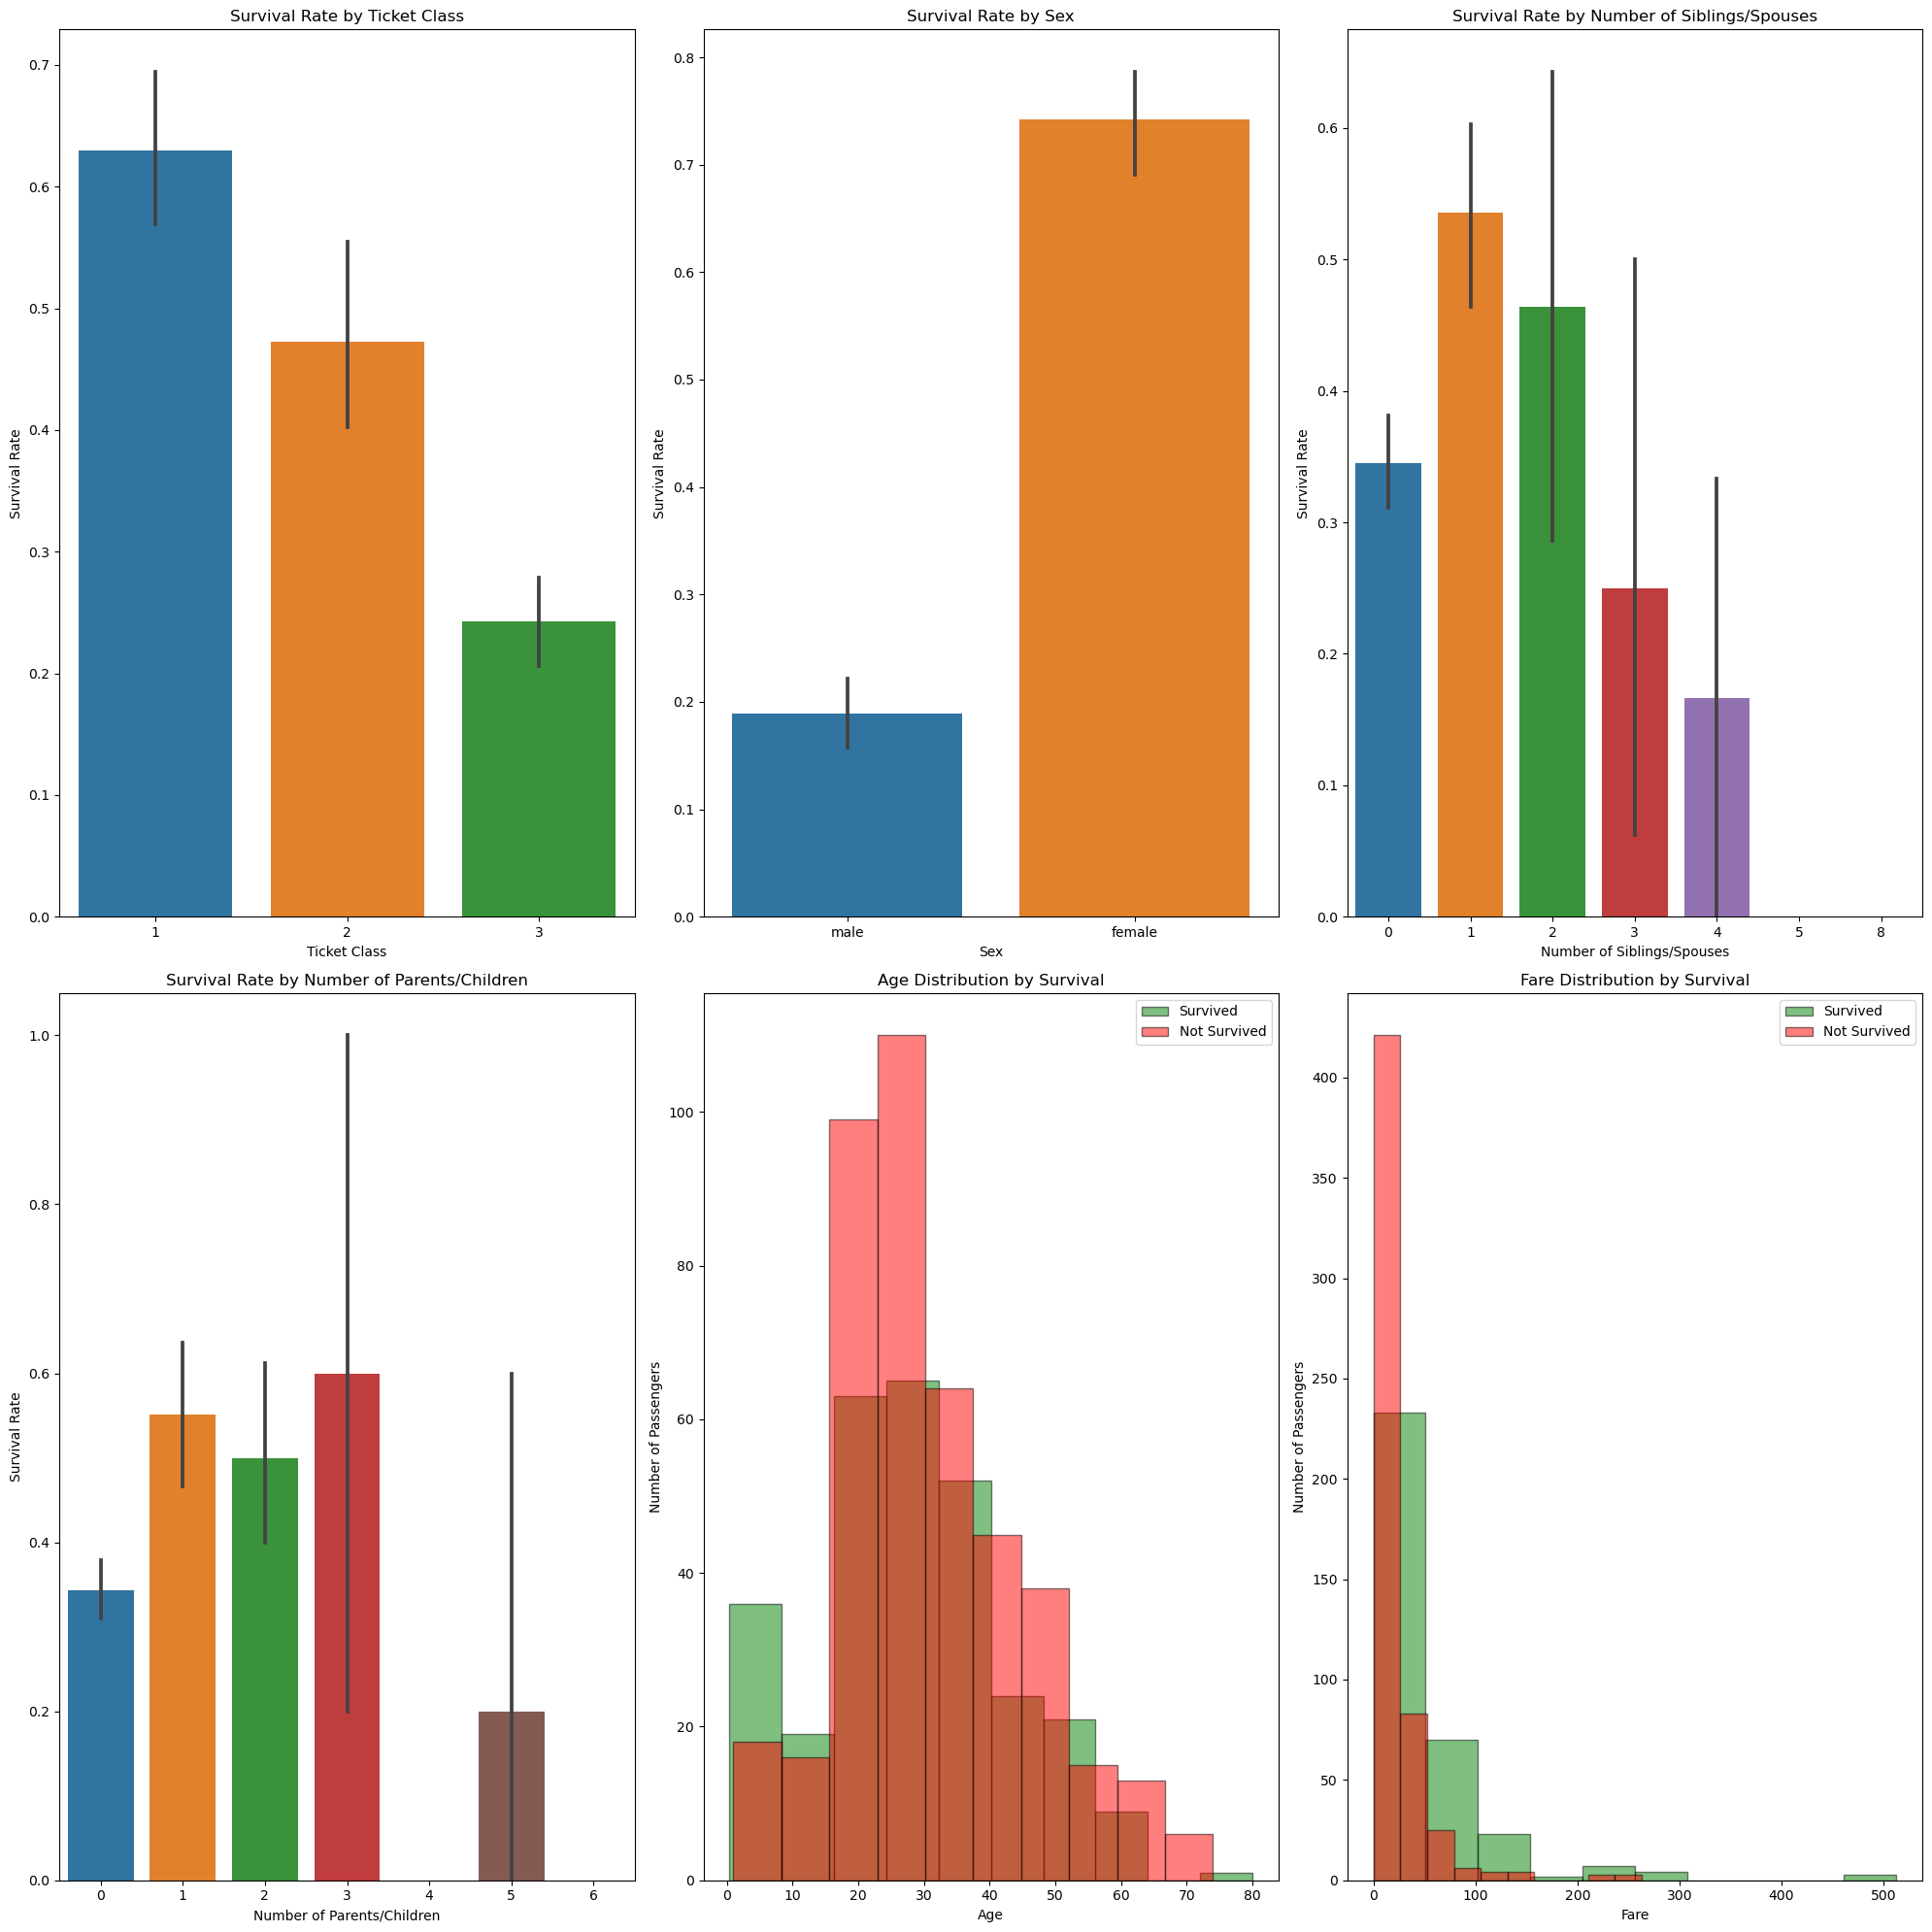

In [11]:
# Lets visualize the relation of the features in realtion to the target (survival)
fig, axes = plt.subplots(2, 3, figsize=(20, 20))

# Survival ration in relation to 'Pclass'
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=train_data)
axes[0, 0].set_title("Survival Rate by Ticket Class")
axes[0, 0].set_xlabel('Ticket Class')
axes[0, 0].set_ylabel('Survival Rate')

# Survival ration in relation to 'Sex'
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=train_data)
axes[0, 1].set_title("Survival Rate by Sex")
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Survival Rate')

# Survival ration in relation to 'SibSp'
sns.barplot(ax=axes[0, 2], x='SibSp', y='Survived', data=train_data)
axes[0, 2].set_title("Survival Rate by Number of Siblings/Spouses")
axes[0, 2].set_xlabel('Number of Siblings/Spouses')
axes[0, 2].set_ylabel('Survival Rate')

# Survival ration in relation to 'Parch'
sns.barplot(ax=axes[1, 0], x='Parch', y='Survived', data=train_data)
axes[1, 0].set_title("Survival Rate by Number of Parents/Children")
axes[1, 0].set_xlabel('Number of Parents/Children')
axes[1, 0].set_ylabel('Survival Rate')

# Histogram for 'Age' with survival overlay
axes[1, 1].hist(train_data[train_data['Survived'] == 1]['Age'].dropna(), alpha=0.5, label='Survived', color='g', edgecolor='black')
axes[1, 1].hist(train_data[train_data['Survived'] == 0]['Age'].dropna(), alpha=0.5, label='Not Survived', color='r', edgecolor='black')
axes[1, 1].set_title("Age Distribution by Survival")
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Number of Passengers')
axes[1, 1].legend()

# Histogram for 'Fare' with survival overlay
axes[1, 2].hist(train_data[train_data['Survived'] == 1]['Fare'], alpha=0.5, label='Survived', color='g', edgecolor='black')
axes[1, 2].hist(train_data[train_data['Survived'] == 0]['Fare'], alpha=0.5, label='Not Survived', color='r', edgecolor='black')
axes[1, 2].set_title("Fare Distribution by Survival")
axes[1, 2].set_xlabel('Fare')
axes[1, 2].set_ylabel('Number of Passengers')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

### Lets Process the training data before we make the model and train it

In [13]:
# Print the data that is categorical and needs to be encoded
print("Categorical features that need to be encoded: ")
print(f"Sex feature labels: {train_data['Sex'].unique()}")
print(f"Port of embark feature labels: {train_data['Embarked'].unique()}")

# Lets encode this variables
train_data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
train_data['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)
train_data['Embarked'].fillna(3, inplace=True)

train_data.head()

Categorical features that need to be encoded: 
Sex feature labels: ['male' 'female']
Port of embark feature labels: ['S' 'C' 'Q' nan]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [14]:
# Now, ill remove some features that i ill not use, at least for now, that i consider not relevant
train_data = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
print("New shape of data: ", train_data.shape)
train_data.head()

New shape of data:  (891, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0


In [15]:
# Now lets remove the rows that did not embark, that is, the 'Embarked' code its equal to 3
train_data = train_data[train_data['Embarked'] != 3]
print("New shape of data: ", train_data.shape)
train_data.head()

New shape of data:  (889, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0


###### Now lets make some feature scalling
Lets scall 'Age' and 'Fare' because they cover a widly range of numbers

In [17]:
# 'Age' follows a normal distribution so probably Standardization is better
scaler_age = StandardScaler()
train_data['Age'] = scaler_age.fit_transform(train_data[['Age']])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,-0.527669,1,0,7.2500,2.0
1,2,1,1,1,0.577094,1,0,71.2833,0.0
2,3,1,3,1,-0.251478,0,0,7.9250,2.0
3,4,1,1,1,0.369951,1,0,53.1000,2.0
4,5,0,3,0,0.369951,0,0,8.0500,2.0


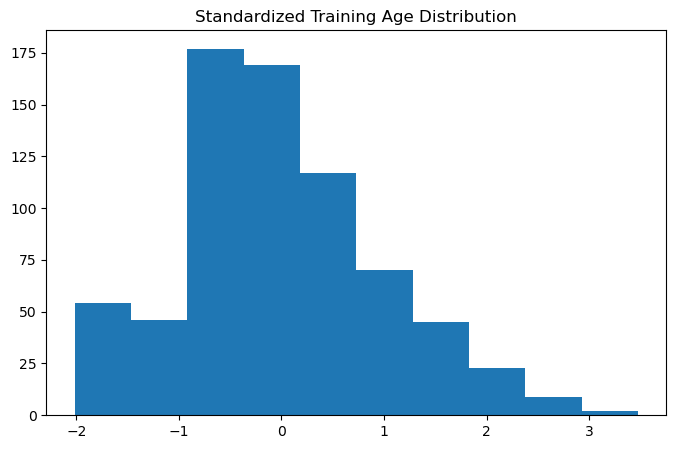

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(train_data['Age'])
plt.title('Standardized Training Age Distribution')
plt.show()

In [19]:
# 'Fare' is not normally distributed so Normalization  is probaby a better choise
scaler_fare = MinMaxScaler()
train_data['Fare'] = scaler_fare.fit_transform(train_data[['Fare']])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,-0.527669,1,0,0.014151,2.0
1,2,1,1,1,0.577094,1,0,0.139136,0.0
2,3,1,3,1,-0.251478,0,0,0.015469,2.0
3,4,1,1,1,0.369951,1,0,0.103644,2.0
4,5,0,3,0,0.369951,0,0,0.015713,2.0


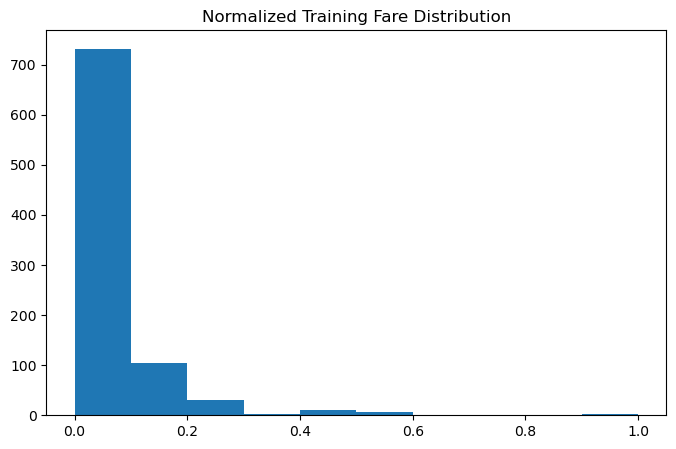

In [20]:
plt.figure(figsize=(8, 5))
plt.hist(train_data['Fare'])
plt.title('Normalized Training Fare Distribution')
plt.show()

In [21]:
# First lets separte the target from features
features = train_data.drop('Survived', axis=1)
targets = train_data['Survived']
print("Shape of features (features): ", features.shape)
print("Shape of targets (target): ", targets.shape)

# Lets check if there are NaN's
if features.isna().any().any():
    print("There are NaN values in the dataframe.")
    # Get the rows where the NaN are
    rows_with_nan = features[features.isna().any(axis=1)]
    # Get the collumns where the NaN are
    columns_with_nan = features.columns[features.isna().any()].tolist()
    print(f"\nThere are {len(rows_with_nan)} rows with NaN on row {columns_with_nan}.")
    print("Some of the rows with NaN: \n", rows_with_nan)

    # Passagers that do not have the age embarked anyways so, ill calculate the mean value of the age and put them in place
    features['Age'].fillna(features['Age'].mean(), inplace=True)

Shape of features (features):  (889, 8)
Shape of targets (target):  (889,)
There are NaN values in the dataframe.

There are 177 rows with NaN on row ['Age'].
Some of the rows with NaN: 
      PassengerId  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
5              6       3    0  NaN      0      0  0.016510       1.0
17            18       2    0  NaN      0      0  0.025374       2.0
19            20       3    1  NaN      0      0  0.014102       0.0
26            27       3    0  NaN      0      0  0.014102       0.0
28            29       3    1  NaN      0      0  0.015379       1.0
..           ...     ...  ...  ...    ...    ...       ...       ...
859          860       3    0  NaN      0      0  0.014110       0.0
863          864       3    1  NaN      8      2  0.135753       2.0
868          869       3    0  NaN      0      0  0.018543       2.0
878          879       3    0  NaN      0      0  0.015412       2.0
888          889       3    1  NaN      1      2  0.0

### Lets Process the test data before we make the model and train it

In [23]:
# Print the data that is categorical and needs to be encoded
print("Categorical features that need to be encoded: ")
print(f"Sex feature labels: {test_data['Sex'].unique()}")
print(f"Port of embark feature labels: {test_data['Embarked'].unique()}")

# Lets encode this variables
test_data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
test_data['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)
test_data['Embarked'].fillna(3, inplace=True)

test_data.head()

Categorical features that need to be encoded: 
Sex feature labels: ['male' 'female']
Port of embark feature labels: ['Q' 'S' 'C']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2


In [24]:
# Now, ill remove some features that i ill not use, at least for now, that i consider not relevant
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
print("New shape of data: ", test_data.shape)
test_data.head()

New shape of data:  (418, 8)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


In [25]:
# Now lets remove the rows that did not embark, that is, the 'Embarked' code its equal to 3
test_data = test_data[test_data['Embarked'] != 3]
print("New shape of data: ", test_data.shape)
test_data.head()

New shape of data:  (418, 8)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


In [26]:
# 'Age' follows a normal distribution so probably Standardization is better
scaler_age = StandardScaler()
test_data['Age'] = scaler_age.fit_transform(test_data[['Age']])
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0.298549,0,0,7.8292,1
1,893,3,1,1.181328,1,0,7.0000,2
2,894,2,0,2.240662,0,0,9.6875,1
3,895,3,0,-0.231118,0,0,8.6625,2
4,896,3,1,-0.584229,1,1,12.2875,2


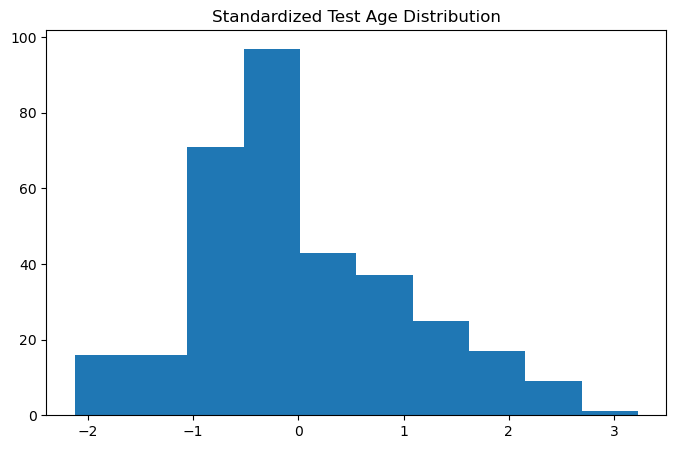

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(test_data['Age'])
plt.title('Standardized Test Age Distribution')
plt.show()

In [28]:
# 'Fare' is not normally distributed so Normalization  is probaby a better choise
scaler_fare = MinMaxScaler()
test_data['Fare'] = scaler_fare.fit_transform(test_data[['Fare']])
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0.298549,0,0,0.015282,1
1,893,3,1,1.181328,1,0,0.013663,2
2,894,2,0,2.240662,0,0,0.018909,1
3,895,3,0,-0.231118,0,0,0.016908,2
4,896,3,1,-0.584229,1,1,0.023984,2


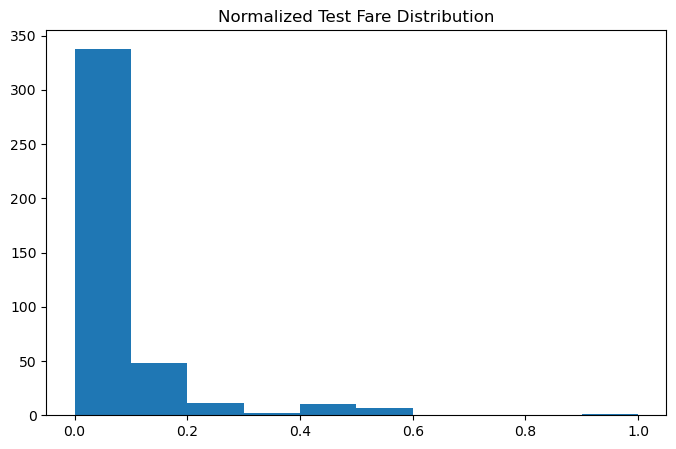

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(test_data['Fare'])
plt.title('Normalized Test Fare Distribution')
plt.show()

In [30]:
# First lets separte the target from features
print("Shape of test_data (features): ", test_data.shape)

# Lets check if there are NaN's
if test_data.isna().any().any():
    print("There are NaN values in the dataframe.")
    # Get the rows where the NaN are
    rows_with_nan = test_data[test_data.isna().any(axis=1)]
    # Get the collumns where the NaN are
    columns_with_nan = test_data.columns[test_data.isna().any()].tolist()
    print(f"\nThere are {len(rows_with_nan)} rows with NaN on row {columns_with_nan}.")
    print("Some of the rows with NaN: \n", rows_with_nan)

    # Passagers that do not have age defined embarked anyways so, ill calculate the mean value of the age and put them in place
    test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
    # Passagers that do not have fare defined embarked anyways so, ill calculate the mean value of the age and put them in place
    test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

Shape of test_data (features):  (418, 8)
There are NaN values in the dataframe.

There are 87 rows with NaN on row ['Age', 'Fare'].
Some of the rows with NaN: 
      PassengerId  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
10           902       3    0  NaN      0      0  0.015412         2
22           914       1    1  NaN      0      0  0.061842         2
29           921       3    0  NaN      2      0  0.042315         0
33           925       3    1  NaN      1      2  0.045771         2
36           928       3    1  NaN      0      0  0.015713         2
..           ...     ...  ...  ...    ...    ...       ...       ...
408         1300       3    1  NaN      0      0  0.015070         1
410         1302       3    1  NaN      0      0  0.015127         1
413         1305       3    0  NaN      0      0  0.015713         2
416         1308       3    0  NaN      0      0  0.015713         2
417         1309       3    0  NaN      1      1  0.043640         0

[87 rows x

### Lets start modeling 
##### Logistic Regression

In [32]:
# Lets split the data of the training set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


# Define a list of max_iter values to test
max_iter_values = [7500, 8000, 8500, 9000, 9500, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
# Define a list of solvers to test
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# To save the best model parameters
best_score = 0
best_model_LogReg = None
best_solver = ''
best_max_iter = 0

# Loop over each combination of max_iter and solver
for max_iter in max_iter_values:
    for solver in solvers:
        # Define the model
        model_LogReg = LogisticRegression(max_iter=max_iter, solver=solver)
        # Lets fit the model
        model_LogReg.fit(X_train, y_train)
        # Evaluate the model on the testing data
        score = model_LogReg.score(X_test, y_test)
        print(f"Solver: {solver}, max_iter: {max_iter}, Score: {score}")

        # Check if current model is the best so far
        if score > best_score:
            best_score = score
            best_model_LogReg = model_LogReg
            best_solver = solver
            best_max_iter = max_iter

# Print the best combination found
print(f"\nBest Solver: {best_solver}, Best max_iter: {best_max_iter}, Best Score: {best_score}")

Solver: newton-cg, max_iter: 7500, Score: 0.7696629213483146
Solver: lbfgs, max_iter: 7500, Score: 0.7696629213483146
Solver: liblinear, max_iter: 7500, Score: 0.7696629213483146
Solver: sag, max_iter: 7500, Score: 0.797752808988764
Solver: saga, max_iter: 7500, Score: 0.7752808988764045
Solver: newton-cg, max_iter: 8000, Score: 0.7696629213483146
Solver: lbfgs, max_iter: 8000, Score: 0.7696629213483146
Solver: liblinear, max_iter: 8000, Score: 0.7696629213483146
Solver: sag, max_iter: 8000, Score: 0.797752808988764
Solver: saga, max_iter: 8000, Score: 0.7752808988764045
Solver: newton-cg, max_iter: 8500, Score: 0.7696629213483146
Solver: lbfgs, max_iter: 8500, Score: 0.7696629213483146
Solver: liblinear, max_iter: 8500, Score: 0.7696629213483146
Solver: sag, max_iter: 8500, Score: 0.797752808988764
Solver: saga, max_iter: 8500, Score: 0.7752808988764045
Solver: newton-cg, max_iter: 9000, Score: 0.7696629213483146
Solver: lbfgs, max_iter: 9000, Score: 0.7696629213483146
Solver: libline

In [33]:
y_pred = best_model_LogReg.predict(X_test)

# Lets evaluate the Logistic Regression model by making a prediction
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.77      0.68      0.72        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix:
[[95 14]
 [22 47]]


In [34]:
# Lets print a more detailed
# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['class 0', 'class 1'], output_dict=True)

# Extract values from classification report
precision_0 = class_report['class 0']['precision']
precision_1 = class_report['class 1']['precision']
recall_0 = class_report['class 0']['recall']
recall_1 = class_report['class 1']['recall']
f1_score_0 = class_report['class 0']['f1-score']
f1_score_1 = class_report['class 1']['f1-score']
support_0 = class_report['class 0']['support']
support_1 = class_report['class 1']['support']
accuracy = class_report['accuracy']
macro_avg_precision = class_report['macro avg']['precision']
macro_avg_recall = class_report['macro avg']['recall']
macro_avg_f1 = class_report['macro avg']['f1-score']
weighted_avg_precision = class_report['weighted avg']['precision']
weighted_avg_recall = class_report['weighted avg']['recall']
weighted_avg_f1 = class_report['weighted avg']['f1-score']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Print the information
print("Classification Report:")
print("Precision:")
print("Precision is a measure of how many of the correctly predicted instances for a class (true positives) actually belong to that class.")
print(f"Precision for class 0 (precision of 0): {precision_0:.2f}")
print(f"Precision for class 1 (precision of 1): {precision_1:.2f}")
print("\nRecall:")
print("Recall is a measure of how many of the true positives for a class were predicted correctly.")
print(f"Recall for class 0 (recall of 0): {recall_0:.2f}")
print(f"Recall for class 1 (recall of 1): {recall_1:.2f}")
print("\nF1-score:")
print("The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both measures.")
print(f"F1-score for class 0: {f1_score_0:.2f}")
print(f"F1-score for class 1: {f1_score_1:.2f}")
print("\nSupport:")
print("The support is the number of actual occurrences of each class in the dataset.")
print(f"Support for class 0: {support_0}")
print(f"Support for class 1: {support_1}")
print("\nAccuracy:")
print("Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.")
print(f"Accuracy: {accuracy:.2%}")
print("\nMacro Average:")
print("The macro average calculates the metric independently for each class and then takes the average.")
print(f"Macro average precision: {macro_avg_precision:.2f}")
print(f"Macro average recall: {macro_avg_recall:.2f}")
print(f"Macro average F1-score: {macro_avg_f1:.2f}")
print("\nWeighted Average:")
print("The weighted average calculates the metric for each class, but takes into account the support (number of instances) for each class.")
print(f"Weighted average precision: {weighted_avg_precision:.2f}")
print(f"Weighted average recall: {weighted_avg_recall:.2f}")
print(f"Weighted average F1-score: {weighted_avg_f1:.2f}")
print("\nConfusion Matrix:")
print("A confusion matrix is a table that is often used to describe the performance of a classification model. It shows the number of correct and incorrect predictions made by the classification model compared to the actual outcomes (true labels) in the test data.")
print(f"True negatives (TN): {tn}")
print("Instances correctly predicted as class 0.")
print(f"False positives (FP): {fp}")
print("Instances incorrectly predicted as class 0 (actually class 1).")
print(f"False negatives (FN): {fn}")
print("Instances incorrectly predicted as class 1 (actually class 0).")
print(f"True positives (TP): {tp}")
print("Instances correctly predicted as class 1.")

Classification Report:
Precision:
Precision is a measure of how many of the correctly predicted instances for a class (true positives) actually belong to that class.
Precision for class 0 (precision of 0): 0.81
Precision for class 1 (precision of 1): 0.77

Recall:
Recall is a measure of how many of the true positives for a class were predicted correctly.
Recall for class 0 (recall of 0): 0.87
Recall for class 1 (recall of 1): 0.68

F1-score:
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both measures.
F1-score for class 0: 0.84
F1-score for class 1: 0.72

Support:
The support is the number of actual occurrences of each class in the dataset.
Support for class 0: 109
Support for class 1: 69

Accuracy:
Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
Accuracy: 79.78%

Macro Average:
The macro average calculates the metric independently for each class and then t


# Lets get the submission file

In [36]:
# Make the prediciton on the test_data
pred_LogReg = best_model_LogReg.predict(test_data)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_LogReg})
output.to_csv('submission_LogReg.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
